# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
raw_X_train, raw_y_train = train['features'], train['labels']
raw_X_test, raw_y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = train["labels"].shape[0]

# TODO: Number of testing examples.
n_test = test["labels"].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train["features"][0].shape

# TODO: How many unique classes/labels there are in the dataset.
all_labels,all_labels_index=np.unique(train['labels'],return_index=True)
n_classes = all_labels.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

Label of this image: 0


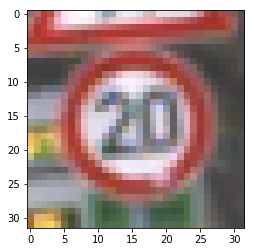

In [4]:
img_id=10
test_img=train["features"][img_id]
plt.imshow(test_img)
print("Label of this image: %s"%train["labels"][img_id])

### Visualize sample images of each label

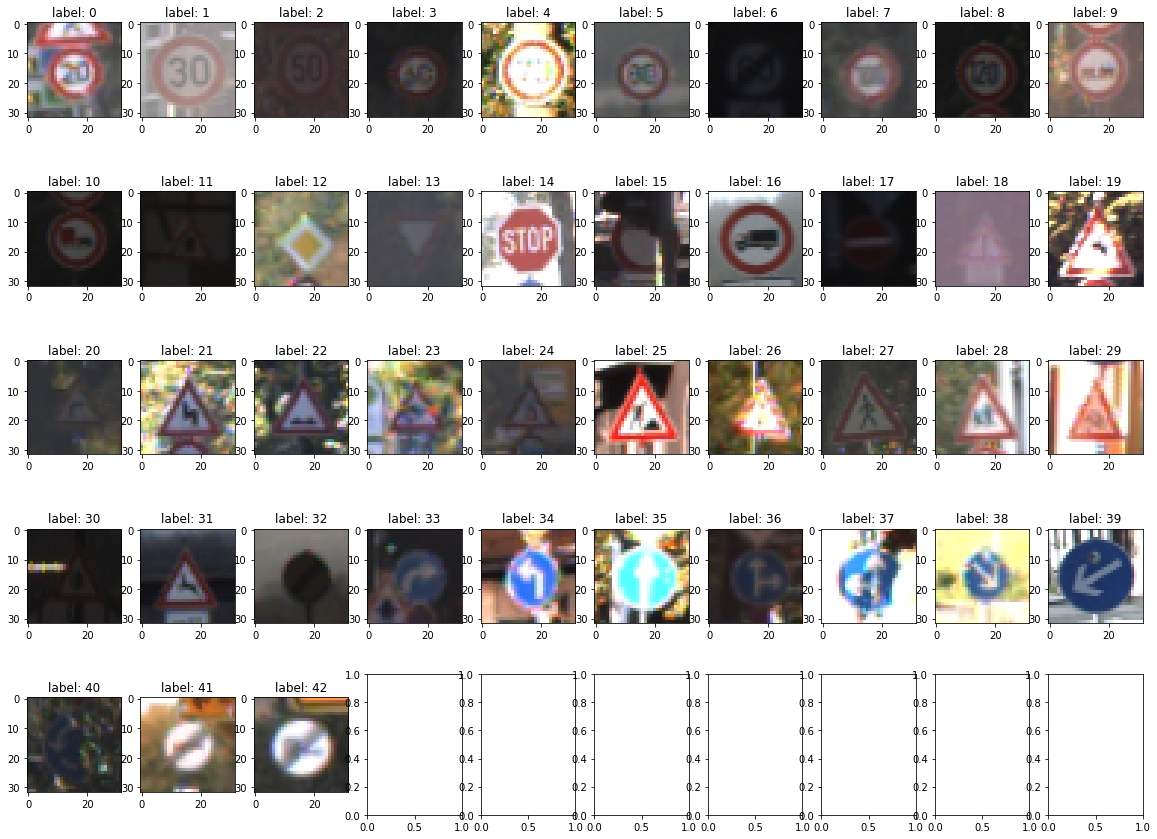

In [5]:
f,ax=plt.subplots(5,10,figsize=(20,15))
for i in range(n_classes):
    subplot_x=i//10
    subplot_y=i%10
    ax[subplot_x,subplot_y].imshow(raw_X_train[all_labels_index[i]])
    ax[subplot_x,subplot_y].set_title("label: %s"%all_labels[i])

### Visualize the distribution of the labels in train and test data

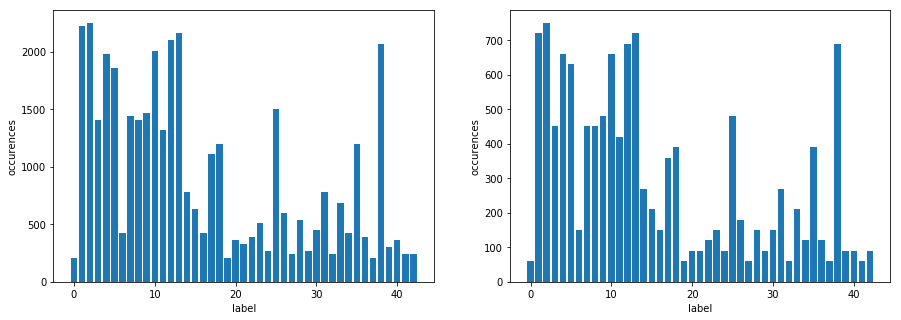

In [6]:
f,ax=plt.subplots(1,2,figsize=(15,5))
unique_values,unique_counts=np.unique(train["labels"],return_counts=True)
ax[0].bar(unique_values,unique_counts)
ax[0].set_xlabel("label")
ax[0].set_ylabel("occurences")

unique_values,unique_counts=np.unique(test["labels"],return_counts=True)
ax[1].bar(unique_values,unique_counts)
ax[1].set_xlabel("label")
ax[1].set_ylabel("occurences")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Convert the image from RGB space to YUV space
Note: the steps of preprocessing are wrapped into classes in order to be compatible with ```Pipeline``` in Sci-kit learn.

In [8]:
import cv2
class YUVConverter(object):
    
    def __init__(self,keep_channel=0):
        self.keep_channel=keep_channel
        
    def transform(self,X,y=None,**fit_params):
        new_data=np.zeros_like(X)
        for i in range(X.shape[0]):
            new_data[i,:,:,:]=cv2.cvtColor(X[i,:,:,:], cv2.COLOR_BGR2YUV)
        
        
        new_data=new_data[:,:,:,self.keep_channel]
        return new_data
    
    def fit(self,X,y):
    
        return self

### Normalize the image

In [9]:
class SubMean(object):
    
    def transform(self,X,y=None,**fit_params):
        
        mean_X=np.mean(X,axis=(1,2),keepdims=True)
        return X-mean_X
    
    def fit(self,X,y,**fit_params):
        return self 
    
class Standarizer(object):
    
    def transform(self,X,y=None,**fit_params):
        
        mean_X=np.mean(X,axis=(1,2),keepdims=True)
        std_X=np.std(X,axis=(1,2),keepdims=True)
        return (X-mean_X)/std_X
        
    
    def fit(self,X,y,**fit_params):
        return self
    

In [10]:
def select_label(X,y,index_list):
    """
    Select the dataset with designated labels
    """
    idx=np.in1d(y,index_list)
    new_X=X[idx]
    new_y=y[idx]
    
    return new_X,new_y

In [11]:
# Pipeline 1: convert the image to YUV space, keep all the channels, run normalization
p1=Pipeline(steps=[('yuv',YUVConverter(keep_channel=[0,1,2])),('sm',Standarizer())])
# Pipeline 2: convert the image to YUV space, keep Y channel only,run normalization 
p2=Pipeline(steps=[('yuv',YUVConverter(keep_channel=[0])),('sm',Standarizer())])
# Pipelin3 3: Keep the image in RGB space, do normalization.
p3=Pipeline(steps=[('stdscaler',Standarizer())])

selected_pipeline=p2
m_X_train=selected_pipeline.fit_transform(raw_X_train,raw_y_train)
m_X_test=selected_pipeline.fit_transform(raw_X_test,raw_y_test)

In [12]:
m_X_train.shape

(39209, 32, 32, 1)

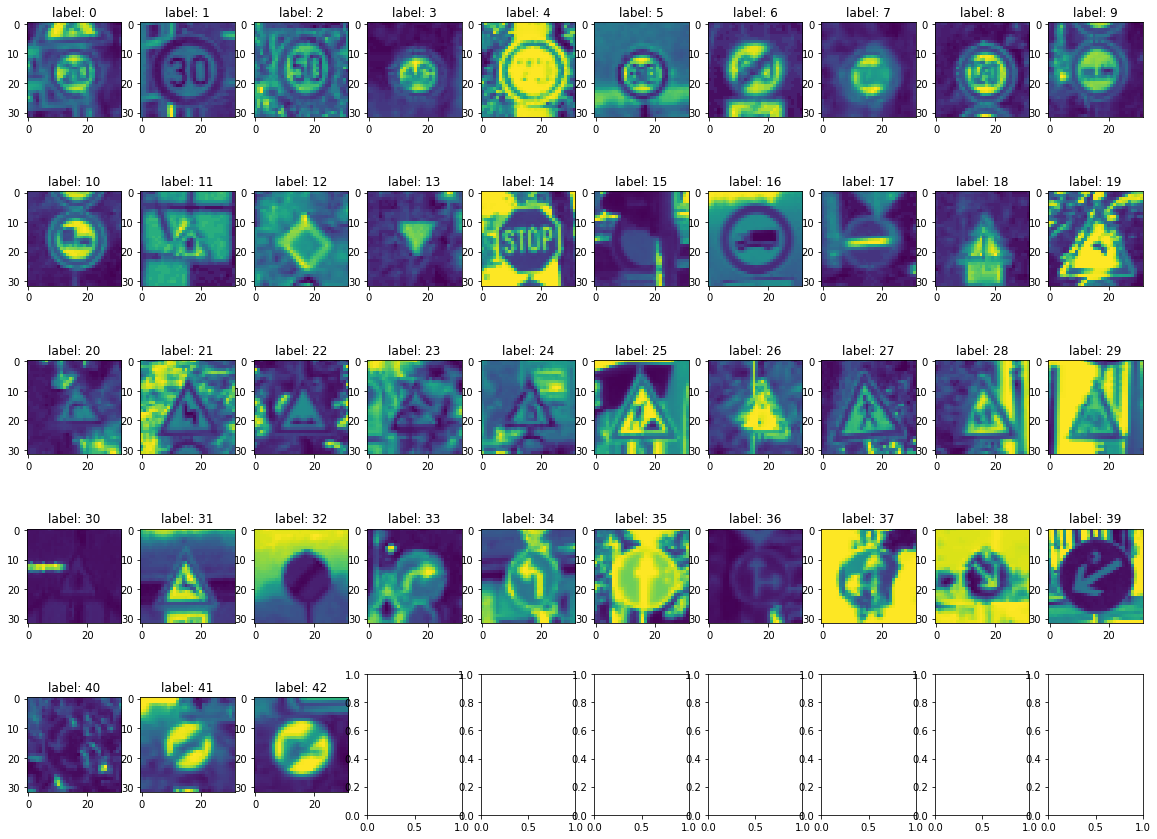

In [13]:
f,ax=plt.subplots(5,10,figsize=(20,15))
for i in range(n_classes):
    subplot_x=i//10
    subplot_y=i%10
    ax[subplot_x,subplot_y].imshow(m_X_train[all_labels_index[i],:,:,0],)
    ax[subplot_x,subplot_y].set_title("label: %s"%all_labels[i])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I tried three different proprocessing. Each of these preprocessing were wrapped into a Sci-kit learn ```Pipeline``` object.

1. Converting the images from RGB to YUV space and then normalizing the image. 
2. Converting the images from RGB to YUV space, keep Y channel only, and then normalizing the image. This is essentially converting the images from RGB to greyscale.
3. Normalizing the images in their original RGB space. 

Three approaches give very close results in our model. The differences in resulting accuracy on the test dataset is around 1%

In [14]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [15]:
aug_training_file="./traffic-signs-data/aug_train.p"
with open(aug_training_file, mode='rb') as f:
    aug_train=pickle.load(f)

In [16]:
X1=aug_train['vert_sym_features']
y1=aug_train['vert_sym_labels']
X2=aug_train['horiz_sym_features']
y2=aug_train['horiz_sym_labels']
X3=aug_train['fp_features']
y3=aug_train['fp_labels']
X4=aug_train['rotate_features']
y4=aug_train['rotate_lables']
X5=aug_train['affine_features']
y5=aug_train['affine_labels']

assert X1.shape[0]==y1.shape[0]
assert X2.shape[0]==y2.shape[0]

aug_X=np.concatenate((X1,X2,X3,X4,X5),axis=0)
aug_y=np.concatenate((y1,y2,y3,y4,y5),axis=0)
aug_X_train=selected_pipeline.fit_transform(aug_X,aug_y)

m_X_train=np.concatenate((m_X_train,aug_X_train),axis=0)
raw_y_train=np.concatenate((raw_y_train,aug_y),axis=0)

Show the occurances of each label with augmented data

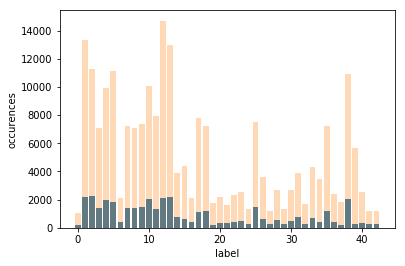

In [17]:
unique_values,unique_counts=np.unique(train["labels"],return_counts=True)
plt.bar(unique_values,unique_counts,label="original")

unique_values,unique_counts=np.unique(raw_y_train,return_counts=True)
plt.bar(unique_values,unique_counts,alpha=0.3,label="augmented")
plt.xlabel("label")
plt.ylabel("occurences")

In [18]:
# Fill-in the final X_train,y_train,X_validation, y_validation, X_test, y_test here.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(m_X_train, 
                                                                raw_y_train, test_size=0.2, random_state=2)
X_test=m_X_test
y_test=raw_y_test

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I randomly selected 20% of the data in ```train[features]``` as the validation set, and the rest of data in ```train['features']``` were used as the training data. All the test data (```test['features')```) are used as the test data set. 

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [20]:
import tensorflow as tf
EPOCHS = 100
BATCH_SIZE = 1280

In [21]:
from tensorflow.contrib.layers import flatten
def LeNet(x,dropout_keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    l1_filter_width=5
    l1_filter_height=5
    l1_k_output=6
    color_channels=X_train.shape[-1]
    
    l1_filter=tf.Variable(tf.truncated_normal([l1_filter_width, 
                                               l1_filter_height, color_channels, l1_k_output],mean=mu,stddev=sigma))
    l1_bias=tf.Variable(tf.zeros(l1_k_output))
    
    l1_stride=1
    l1_x = tf.nn.conv2d(x, l1_filter, strides=[1, l1_stride, l1_stride, 1], padding='VALID')
    l1_x = l1_x+ l1_bias
        
    # TODO: Activation.
    l1_x=tf.nn.relu(l1_x)
    l1_x=tf.nn.local_response_normalization(l1_x)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    
    l2_x=tf.nn.max_pool(
    l1_x,
    ksize=[1, 3, 3, 1],
    strides=[1, 2, 2, 1],
    padding='VALID')

    l1_output=l2_x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    l2_k_output=16
    
    l2_filter=tf.Variable(tf.truncated_normal([l1_filter_width, 
                                               l1_filter_height, l1_k_output, l2_k_output],
                         mean=mu,stddev=sigma))
    
    l2_bias=tf.Variable(tf.zeros(l2_k_output))
    l2_x = tf.nn.conv2d(l2_x, l2_filter, strides=[1, l1_stride, l1_stride, 1], padding='VALID')
    l2_x = tf.nn.bias_add(l2_x, l2_bias)

    # TODO: Activation.
    
    l2_x=tf.nn.relu(l2_x)
    l2_x=tf.nn.local_response_normalization(l2_x)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    l3_x=tf.nn.max_pool(l2_x,
                       ksize=[1,3,3,1],
                       strides=[1,2,2,1],
                       padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    
    l4_x=flatten(l3_x) # use "-1" to reduce the tensor to 1-d
    l1_output=flatten(l1_output)
    print(l4_x.get_shape())
    print(l1_output.get_shape())
    
    l4_x=tf.concat(concat_dim=1,values=[l4_x,l1_output])
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    
    features_n=256+1014
    hidden_layer_1_n=120
    
    weights_0=tf.Variable(tf.truncated_normal([features_n,hidden_layer_1_n],mean=mu,stddev=sigma))
    biases_0=tf.Variable(tf.zeros(hidden_layer_1_n))
    
    l4_x=tf.matmul(l4_x,weights_0)+biases_0
    
    # TODO: Activation.
    
    l5_x=tf.nn.relu(l4_x)
    
    l5_x=tf.nn.dropout(l5_x,keep_prob=dropout_keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    hidden_layer_2_n=84
    weights_1=tf.Variable(tf.truncated_normal([hidden_layer_1_n,hidden_layer_2_n],mean=mu,stddev=sigma))
    biases_1=tf.Variable(tf.zeros([hidden_layer_2_n]))
    l5_x=tf.add(tf.matmul(l5_x,weights_1),biases_1)
    
    # TODO: Activation.
    l6_x=tf.nn.relu(l5_x)
    l6_x=tf.nn.dropout(l6_x,keep_prob=dropout_keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    
    hidden_layer_3_n=n_classes
    weights_2=tf.Variable(tf.truncated_normal([hidden_layer_2_n,hidden_layer_3_n],mean=mu,stddev=sigma))
    biases_2=tf.Variable(tf.zeros([hidden_layer_3_n]))
    
    logits=tf.add(tf.matmul(l6_x,weights_2),biases_2)
    
    return logits

Define the training and test set

In [22]:
print(n_classes)

43


In [23]:
x = tf.placeholder(tf.float32, (None, *X_train.shape[1:]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
dropout_keep_prob=tf.placeholder(tf.float32)

training pipeline

In [24]:
rate = 5e-4
logits = LeNet(x,dropout_keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

(?, 256)
(?, 1014)


In [25]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,dropout_keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [26]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [27]:
%%time
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("number of training samples:%s"%num_examples)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,dropout_keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    test_accuracy = evaluate(X_test, y_test)
    print("test accuracy: %s"%test_accuracy)

number of training samples:180498
Training...

EPOCH 1 ...
Validation Accuracy = 0.415

EPOCH 2 ...
Validation Accuracy = 0.606

EPOCH 3 ...
Validation Accuracy = 0.697

EPOCH 4 ...
Validation Accuracy = 0.756

EPOCH 5 ...
Validation Accuracy = 0.788

EPOCH 6 ...
Validation Accuracy = 0.816

EPOCH 7 ...
Validation Accuracy = 0.834

EPOCH 8 ...
Validation Accuracy = 0.855

EPOCH 9 ...
Validation Accuracy = 0.862

EPOCH 10 ...
Validation Accuracy = 0.872

EPOCH 11 ...
Validation Accuracy = 0.883

EPOCH 12 ...
Validation Accuracy = 0.892

EPOCH 13 ...
Validation Accuracy = 0.893

EPOCH 14 ...
Validation Accuracy = 0.904

EPOCH 15 ...
Validation Accuracy = 0.908

EPOCH 16 ...
Validation Accuracy = 0.909

EPOCH 17 ...
Validation Accuracy = 0.913

EPOCH 18 ...
Validation Accuracy = 0.921

EPOCH 19 ...
Validation Accuracy = 0.923

EPOCH 20 ...
Validation Accuracy = 0.927

EPOCH 21 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.9

In [28]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("test accuracy: %s"%test_accuracy)

test accuracy: 0.969596215873


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

**Preprocessing:**




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [30]:
# Load signnames.csv
import pandas as pd
signnames_df=pd.DataFrame.from_csv("signnames.csv")
signnames_df.head()

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)


In [31]:
signnames_df.tail()

,SignName
ClassId,
38,Keep right
39,Keep left
40,Roundabout mandatory
41,End of no passing
42,End of no passing by vehicles over 3.5 metric ...


In [32]:
import matplotlib.image as mpimg

total_image=8
all_test_image=np.zeros((total_image,32,32,3))
for i in range(1,total_image+1):
    img_file='./additional_images/img_%s.jpeg'%i
    image1=mpimg.imread(img_file)
    all_test_image[i-1]=image1

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [33]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [34]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [35]:
all_conv_test_image=selected_pipeline.fit_transform(all_test_image.astype(np.uint8),None)

In [36]:
top_k=3 #the number of top probabilities to be output
predict=tf.argmax(logits, 1)
predict_prob=tf.nn.softmax(logits)
top_pred_prob=tf.nn.top_k(predict_prob,top_k)
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    predictions=sess.run(predict_prob,feed_dict={x:all_conv_test_image,dropout_keep_prob:1.0})
    results=sess.run(top_pred_prob,feed_dict={x:all_conv_test_image,dropout_keep_prob:1.0})


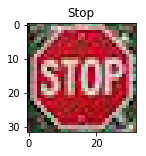

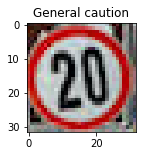

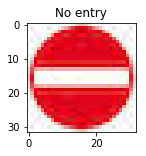

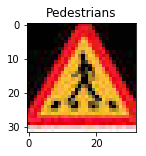

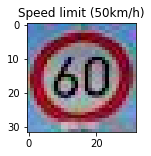

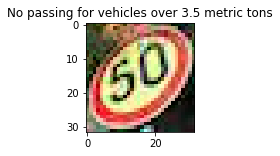

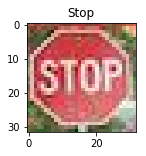

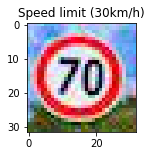

In [37]:
for i in range(total_image):
    plt.figure(figsize=(2,2))
    plt.imshow(all_test_image[i].astype(np.uint8))
    plt.title(signnames_df.iloc[predictions[i].argmax(),0])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

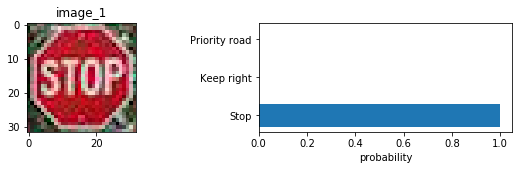

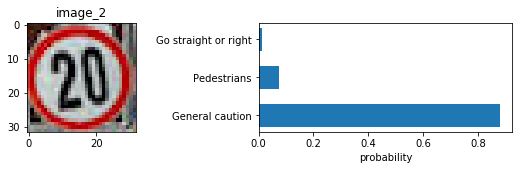

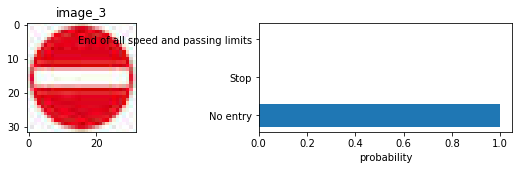

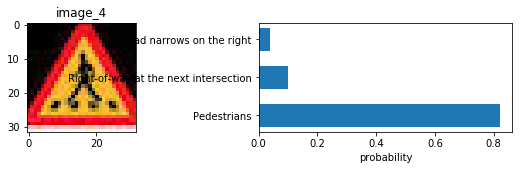

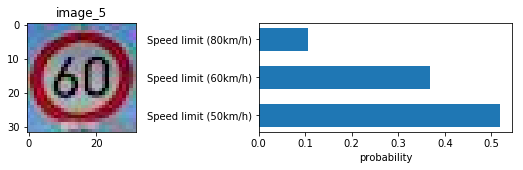

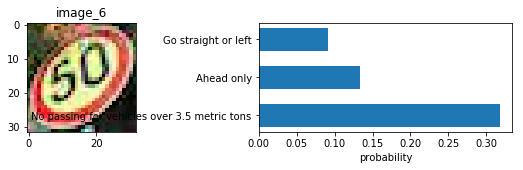

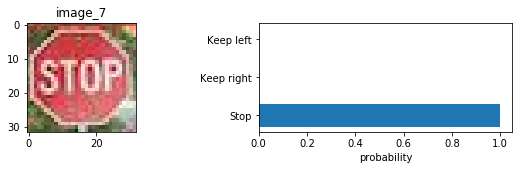

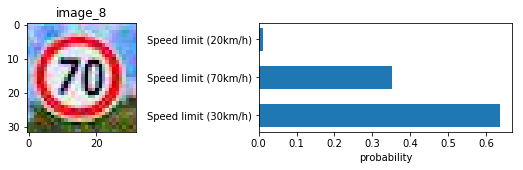

In [38]:
for i in range(results.values.shape[0]):
    fg,ax=plt.subplots(1,2,figsize=(10,2))
    idx=results.indices[i,:]
    width=2
    ind=np.arange(top_k)
    ax[0].imshow(all_test_image[i].astype(np.uint8))
    ax[0].set_title("image_%s"%(i+1))
    ax[1].barh(width+ind,
            results.values[i,:],width*0.3,align='center')
    ax[1].set_yticks(ind + width)
    ax[1].set_yticklabels(signnames_df.iloc[idx,0].values)
    ax[1].set_xlabel('probability')

**Answer:**

The images

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Temp validation area

In [39]:
aug_training_file="./traffic-signs-data/aug_train.p"
with open(aug_training_file, mode='rb') as f:
    aug_train=pickle.load(f)

In [40]:
aug_train.keys()

dict_keys(['horiz_sym_labels', 'vert_sym_features', 'horiz_sym_features', 'vert_sym_labels', 'rotate_lables', 'affine_labels', 'affine_features', 'fp_features', 'rotate_features', 'fp_labels'])

In [41]:
aug_train_X=aug_train['vert_sym_features']
aug_train_y=aug_train['vert_sym_labels']

fpX=aug_train['fp_features']
fpY=aug_train['fp_labels']

aug_train_X=selected_pipeline.fit_transform(X4,y4)
aug_train_y=y4

In [42]:
aug_train_X.shape

(39209, 32, 32, 1)

In [43]:
aug_train_y.shape

(39209,)

In [44]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(aug_train_X, aug_train_y)
    print("test accuracy: %s"%test_accuracy)

test accuracy: 0.995638768223
